In [27]:
# load data.csv into pandas

import pandas as pd

data = pd.read_csv('data.csv', delimiter=';')
# convert target to numeric
# Dropout -> 0, Enrolled -> 1, Graduate -> 2
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

X = data.drop('Target', axis=1)
y = data['Target']

print(X.head())
print(y.shape)

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [28]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



In [29]:
# perform LOF outlier detection on X

from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers1 = lof.fit_predict(X_pca)

print(outliers1)

# count outliers
outliers1 = pd.Series(outliers1)
print(outliers1.value_counts())


[1 1 1 ... 1 1 1]
 1    3981
-1     443
Name: count, dtype: int64


In [30]:
# perform Isolation Forest, compare results

from sklearn.ensemble import IsolationForest

iforest = IsolationForest(contamination=0.1)
outliers2 = iforest.fit_predict(X_pca)

print(outliers2)

# count outliers
outliers2 = pd.Series(outliers2)
print(outliers2.value_counts())

[-1  1  1 ...  1  1  1]
 1    3981
-1     443
Name: count, dtype: int64


In [31]:
# perform Elliptic Envelope

from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=0.1)
outliers3 = ee.fit_predict(X_pca)

print(outliers3)

# count outliers
outliers3 = pd.Series(outliers3)
print(outliers3.value_counts())


[-1  1  1 ...  1  1  1]
 1    3981
-1     443
Name: count, dtype: int64


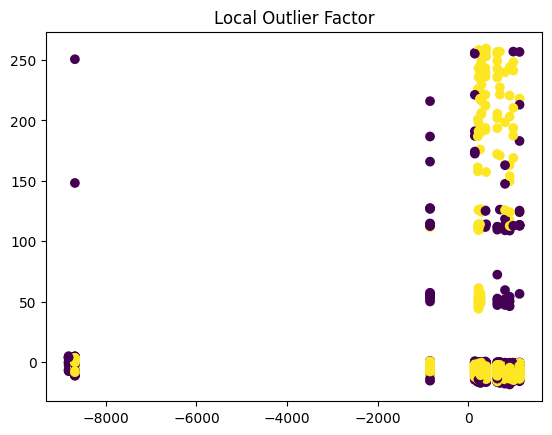

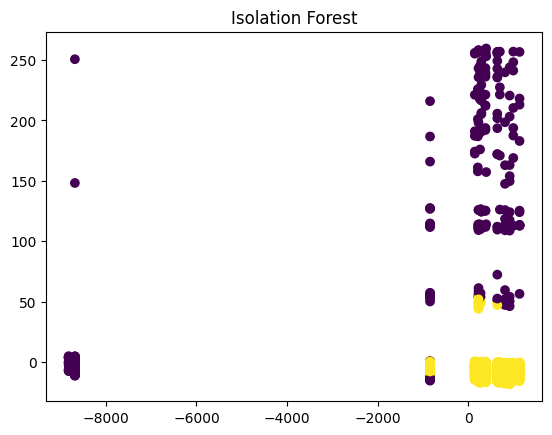

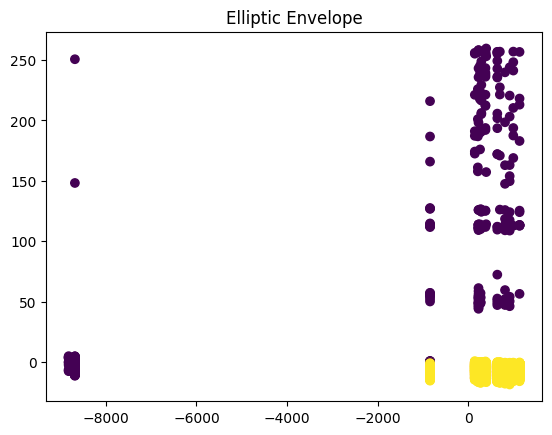

In [32]:
# plot scatter of X_pca, color by outliers

import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers1)
plt.title('Local Outlier Factor')
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers2)
plt.title('Isolation Forest')
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers3)
plt.title('Elliptic Envelope')
plt.show()


